In [1]:
from xgboost import XGBClassifier
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

In [18]:
dataDirectory = '/mnt/home/jbielecki1/test_env_dir/p3test/cancerData/wdbc.csv'
data = pd.read_csv(dataDirectory)
x = data.iloc[:,:30]
y = data['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, train_size = 0.7, random_state = 42, stratify = y)

In [23]:
print("Length of dataset: " + str(len(data)))
print("Starting accuracy: " + str(len(y[y == 1])/len(data)*100) + "%")
print("Starting train accuracy: " + str(len(y_train[y_train == 1])/len(y_train)*100) + "%")
print("Starting test accuracy: " + str(len(y_test[y_test == 1])/len(y_test)*100) + "%")

Length of dataset: 569
Starting accuracy: 62.741652021089635%
Starting train accuracy: 62.8140703517588%
Starting test accuracy: 62.57309941520468%


In [24]:
modelAda = AdaBoostClassifier(
    base_estimator = DecisionTreeClassifier(max_depth = 2),
    algorithm = 'SAMME.R',
    n_estimators = 20,
    learning_rate = 0.2
)
modelXGB = XGBClassifier(
    objective = 'binary:logistic',
    booster = 'gbtree',
    subsample = 1,
    n_estimators = 20,
    max_depth = 2,
    learning_rate = 0.2
)

In [25]:
modelXGB.fit(x_train, y_train)
modelAda.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.2, n_estimators=20, random_state=None)

In [26]:
def plotFeatureImportances(features, importances, modelName):
    y_pos = np.arange(features.size)
    plt.clf()
    indexes = np.argsort(importances)
    plt.title("Feature importances - " + modelName)
    plt.barh(y_pos, np.sort(importances))
    plt.yticks(y_pos, features[indexes])
    plt.xlabel('F score')
    plt.ylabel("Feature")
    plt.show()

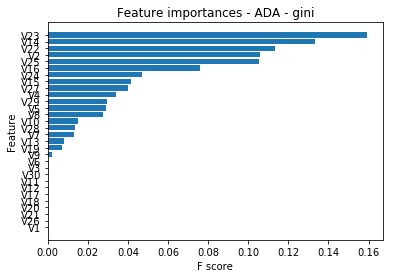

In [27]:
plotFeatureImportances(x_test.columns, modelAda.feature_importances_, 'ADA - gini')

In [28]:
def getXGBFeatureImportances(importance_type, modelXGB):
    feature_importances = modelXGB.get_booster().get_score(importance_type = importance_type)
    feature_importances_values = list(modelXGB.get_booster().get_score(importance_type = importance_type).values())
    feature_importances_sum = sum(feature_importances_values)
    feature_importances_values_norm = [x/feature_importances_sum for x in feature_importances_values]
    correct_feature_importances = dict(zip(
        list(modelXGB.get_booster().get_score(importance_type = importance_type).keys()),
        feature_importances_values_norm
    ))

    for key, value in feature_importances.items():
        correct_feature_importances[key] = value/feature_importances_sum

    correct_names_feature_importances = dict(zip(
        ["f" + str(x) for x in range(len(feature_importances_values))],
        correct_feature_importances.values()
    ))
    return correct_feature_importances

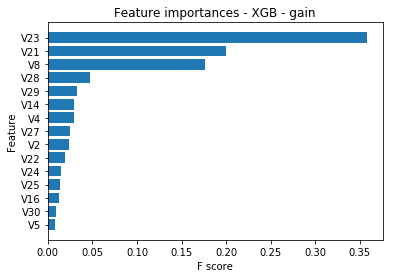

In [29]:
xgb_feature_importances_gain = getXGBFeatureImportances('gain', modelXGB)
xgb_feature_importances_gain_keys = pd.Index(list(xgb_feature_importances_gain.keys()))
xgb_feature_importances_gain_values = list(xgb_feature_importances_gain.values())
plotFeatureImportances(xgb_feature_importances_gain_keys, xgb_feature_importances_gain_values, 'XGB - gain')

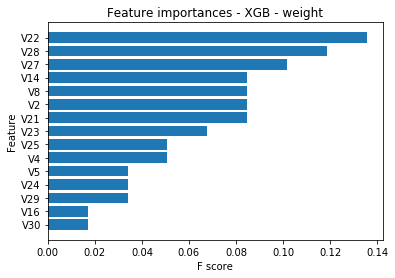

In [30]:
xgb_feature_importances_weight = getXGBFeatureImportances('weight', modelXGB)
xgb_feature_importances_weight_keys = pd.Index(list(xgb_feature_importances_weight.keys()))
xgb_feature_importances_weight_values = list(xgb_feature_importances_weight.values())
plotFeatureImportances(xgb_feature_importances_weight_keys, xgb_feature_importances_weight_values, 'XGB - weight')